In [16]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
%matplotlib notebook

# Filter

In [17]:
def apply_filter(f, nu, k, l):
    ni = f.shape[1]
    nj = f.shape[0]
    
    vi = np.zeros((1, ni), dtype=np.complex128)
    for i in range(0,ni):
        vi[0, i] = np.exp(1j*k*(1.0+i-(ni+1)/2.0))
    
    mi = np.ones((nj, 1), dtype=np.complex128) * vi
    vj = np.zeros((nj, 1), dtype=np.complex128)

    for j in range(0, nj):
        vj[j, 0] = np.exp(1j*l*(1.0+j-(nj+1)/2.0))
        
    mj = vj * np.ones((1, ni), dtype=np.complex128)
    return 1.0+nu * np.sum(np.sum(f * mi * mj))

def analyze_filter(f, nu, name="", wavelength=np.arange(2.0, 10.0, 0.05)):
    k = wavelength
    l = wavelength
    
    arr = np.zeros((k.size, l.size), dtype=np.complex128)

    for i in range(0, k.size):
        for j in range(0, l.size):
            arr[i, j] = np.abs(apply_filter(f, nu, 2.0*pi/k[i], 2.0*pi/l[j]))
    
    X, Y = np.meshgrid(k, l)
    plt.figure()
    plt.title(name)
    levels = [0.1, 0.5, 0.8, 0.9, 0.99, 0.999, 1.0, 1.001, 1.01, 1.1, 1.2];

    CS = plt.contourf(X, Y, arr, levels=levels, alpha=0.5)
    CS = plt.contour(CS, levels=levels,
                     colors=('k',))
    plt.xlabel('Wavelength/dx')
    plt.ylabel('Wavelength/dy')
    plt.clabel(CS, fontsize=9, inline=1)
    plt.show()

def analyze(f, nu_values, name):
    for nu in nu_values:
        analyze_filter(f, nu, name="{} nu: {}".format(name, nu))

<IPython.core.display.Javascript object>


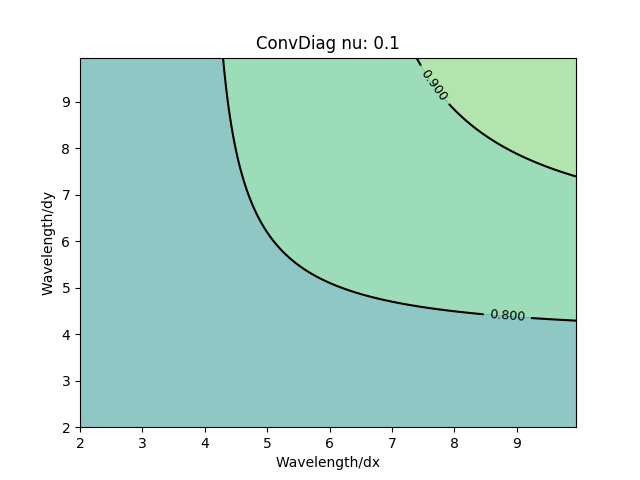

/usr/lib/python3/dist-packages/numpy/ma/core.py:2766: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


<IPython.core.display.Javascript object>


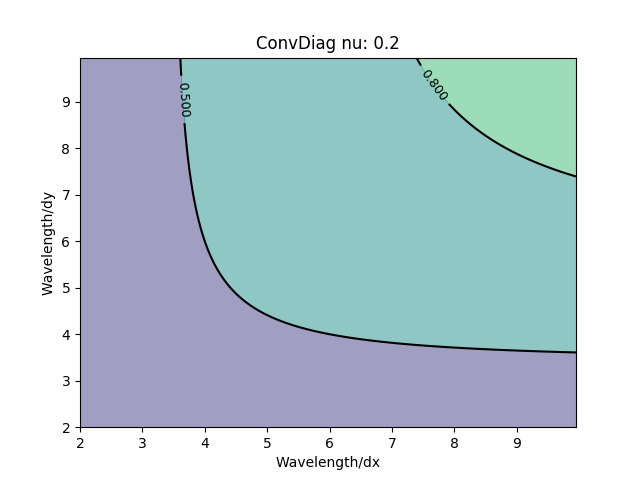

<IPython.core.display.Javascript object>


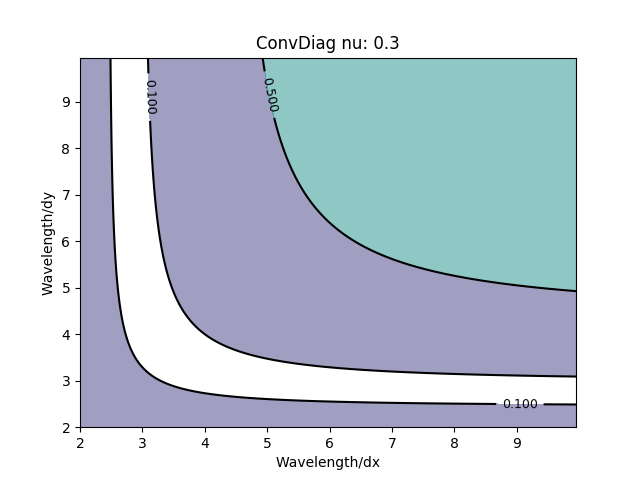

<IPython.core.display.Javascript object>


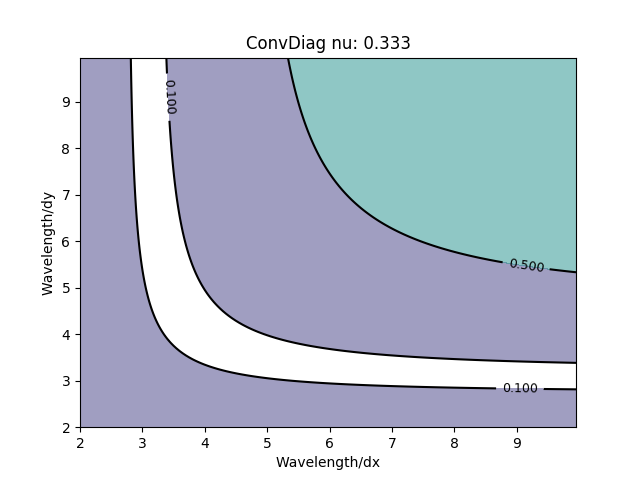

<IPython.core.display.Javascript object>


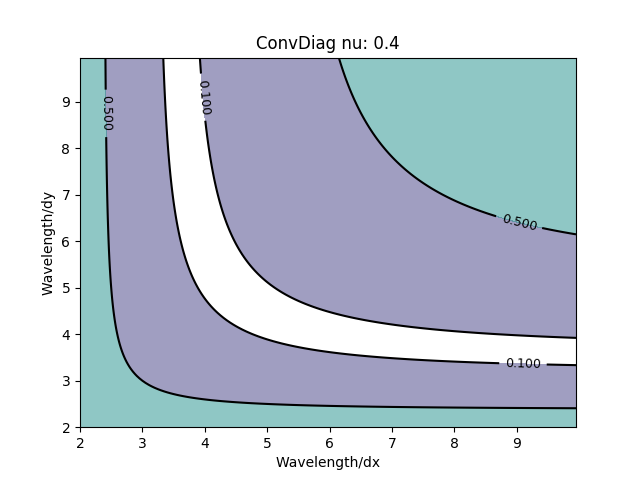

In [18]:
f = np.array([[0.25, 0.5, 0.25], [0.5, -3.0, 0.5], [0.25, 0.5, 0.25]])
nu = [0.1, 0.2, 0.3, 0.333, 0.4]
analyze(f, nu, "ConvDiag")

<IPython.core.display.Javascript object>


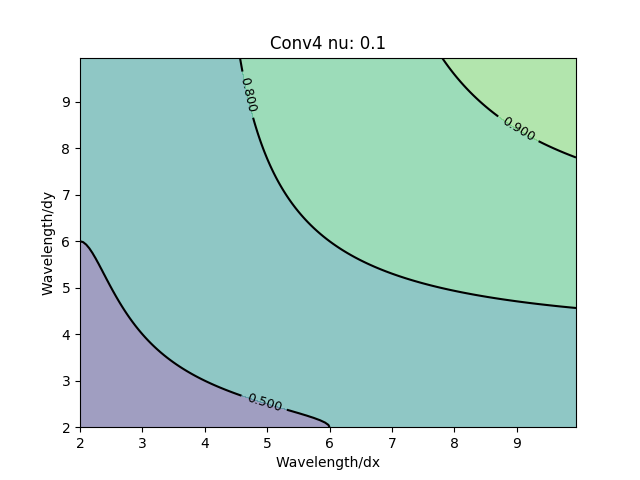

/usr/lib/python3/dist-packages/numpy/ma/core.py:2766: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


<IPython.core.display.Javascript object>


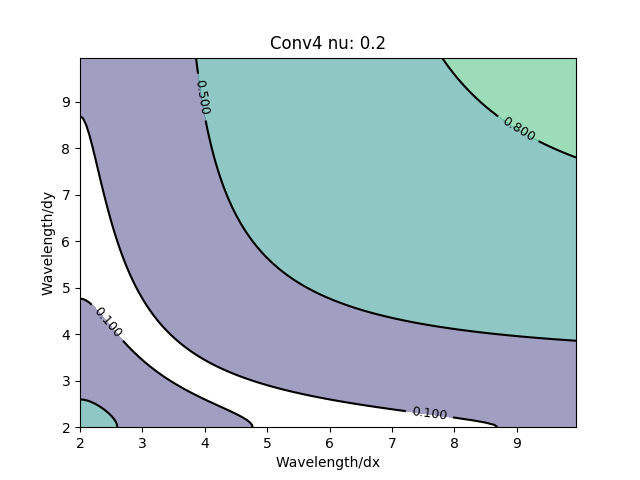

<IPython.core.display.Javascript object>


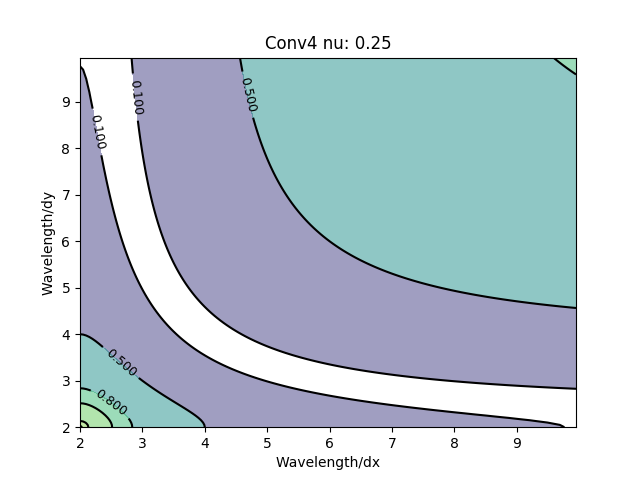

<IPython.core.display.Javascript object>


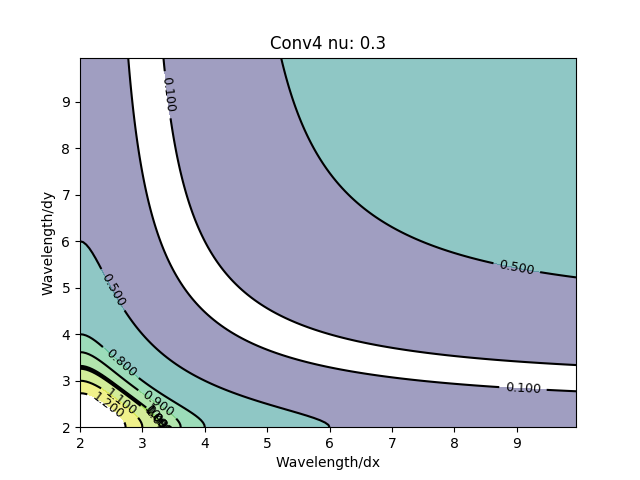

In [20]:
f = np.array([[0, 1, 0], [1, -4.0, 1], [0, 1, 0]])
nu = [0.1, 0.2, 0.25, 0.3]
analyze(f, nu, "Conv4")

<IPython.core.display.Javascript object>


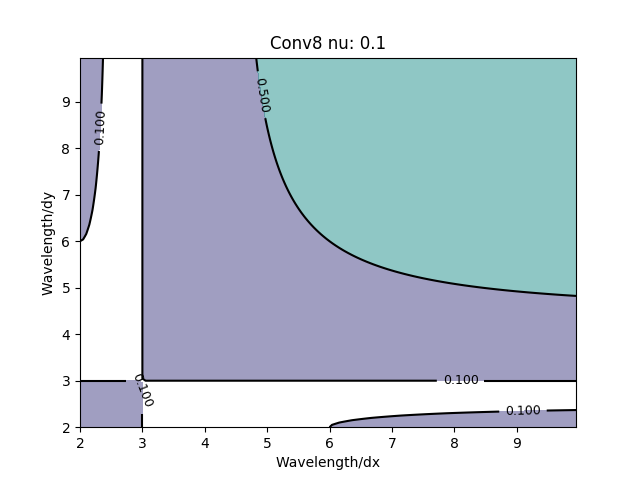

/usr/lib/python3/dist-packages/numpy/ma/core.py:2766: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


<IPython.core.display.Javascript object>


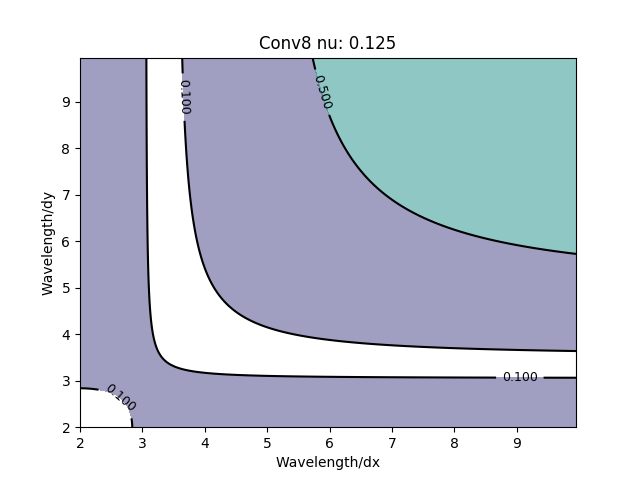

<IPython.core.display.Javascript object>


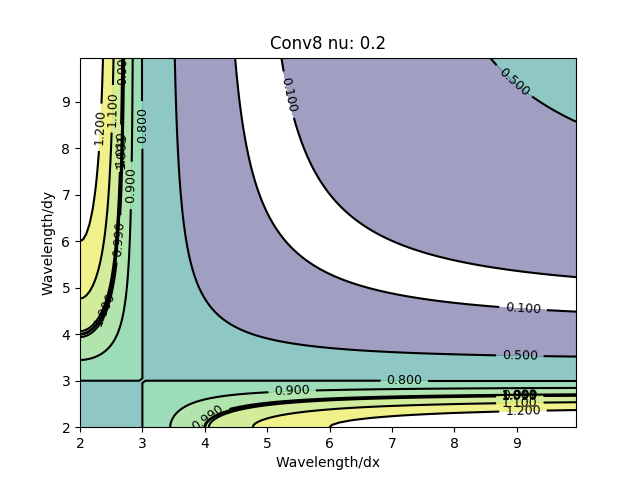

<IPython.core.display.Javascript object>


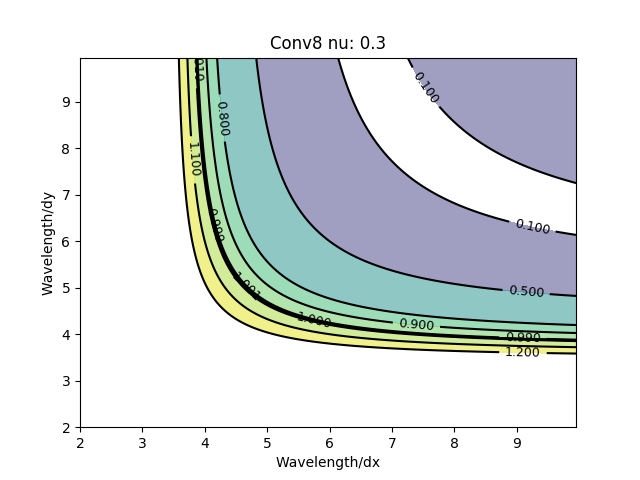

In [22]:
f = np.array([[1, 1, 1], [1, -8.0, 1], [1, 1, 1]])
nu = [0.1, 0.125, 0.2, 0.3]
analyze(f, nu, "Conv8")